In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import requests

In [2]:
handle = input('Enter your handle ')

Enter your handle ghoshsai5000


In [3]:
if handle == '':
    handle = 'razdeep'
url = 'https://codeforces.com/contests/with/'
url += handle

In [4]:
html_page = requests.get(url)

In [5]:
soup = BeautifulSoup(html_page.content)
# print(soup.prettify())

In [6]:
table = soup.find('table', attrs = {'class' : 'user-contests-table'})
# table

In [7]:
ratings_tr = table.findAll('tr')
ratings_tr = ratings_tr[1:]
# ratings_tr

In [8]:
ratings_list = []
for this_row in ratings_tr:
    ratings_list.append(int(this_row.findAll('td')[5].text))
        
ratings_list.reverse()

# ratings_list

In [9]:
ratings_df = pd.DataFrame(ratings_list, columns = ['RATINGS'])

ratings_df.head()

,RATINGS
0,1376
1,1335
2,1319
3,1335
4,1350


In [10]:
idx_df = pd.DataFrame(np.arange(1, len(ratings_list) + 1, dtype='int64'), columns = ['CONTEST'])

idx_df.head()

,CONTEST
0,1
1,2
2,3
3,4
4,5


In [11]:
df = pd.concat([idx_df, ratings_df], axis = 1)
df.columns = ['CONTEST', 'RATINGS']

df.head()

,CONTEST,RATINGS
0,1,1376
1,2,1335
2,3,1319
3,4,1335
4,5,1350


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()
model.fit(idx_df, ratings_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
model.predict([[10]])

array([[1349.61635833]])

## Visualization

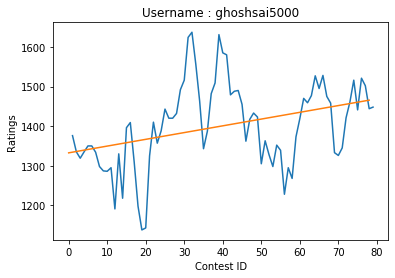

In [15]:
plt.plot(idx_df, ratings_df)
plt.title('Username : {}'.format(handle))
plt.xlabel('Contest ID')
plt.ylabel('Ratings')
dummy_dataset = pd.DataFrame(np.arange(0, ratings_df.shape[0]))
plt.plot(dummy_dataset, model.predict(dummy_dataset))